In [1]:
import pandas as pd
from random import randint,uniform

In [2]:
data = []
cols = ['a','b','c','d','y']
for i in range(500):
    y = randint(0,3)
    if y==0:
        a = randint(1,10)
        b = uniform(1,2)
        c = 10+(uniform(0,1)*10)
        d = 100+(uniform(0,1)*100)
    elif y==1:
        a = randint(11,20)
        b = uniform(3,4)
        c = 20+(uniform(0,1)*10)
        d = 200+(uniform(0,1)*100)
    elif y==2:
        a = randint(21,30)
        b = uniform(5,6)
        c = 30+(uniform(0,1)*10)
        d = 300+(uniform(0,1)*100)
    else:
        a = randint(31,40)
        b = uniform(7,8)
        c = 40+(uniform(0,1)*10)
        d = 400+(uniform(0,1)*100)
    data.append([a,b,c,d,y])
df = pd.DataFrame(data,columns=cols)

In [3]:
print(df)

      a         b          c           d  y
0    19  3.003256  22.376759  297.197826  1
1    30  5.864085  31.561151  326.318323  2
2    20  3.801842  20.746237  285.285876  1
3     5  1.483847  11.240933  175.461336  0
4    20  3.204064  24.961879  274.434414  1
..   ..       ...        ...         ... ..
495  10  1.406910  17.474829  111.786089  0
496  33  7.305078  44.358098  457.637517  3
497   3  1.790782  12.835224  136.250606  0
498  30  5.817521  32.835992  336.220380  2
499  12  3.656347  27.049984  259.577538  1

[500 rows x 5 columns]


In [4]:
data = df[['a','b','c','d']]

In [5]:
label = df['y']

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.10, random_state=42)

In [7]:
from sklearn import tree

In [8]:
clf = tree.DecisionTreeClassifier()

In [9]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
pred_y = clf.predict(test_x)

In [11]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)

1.0


[Text(111.60000000000001, 190.26, 'X[1] <= 2.503\ngini = 0.747\nsamples = 450\nvalue = [125, 104, 123, 98]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 125\nvalue = [125, 0, 0, 0]'),
 Text(167.4, 135.9, 'X[1] <= 4.499\ngini = 0.663\nsamples = 325\nvalue = [0, 104, 123, 98]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 104\nvalue = [0, 104, 0, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[1] <= 6.501\ngini = 0.494\nsamples = 221\nvalue = [0, 0, 123, 98]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 123\nvalue = [0, 0, 123, 0]'),
 Text(279.0, 27.180000000000007, 'gini = 0.0\nsamples = 98\nvalue = [0, 0, 0, 98]')]

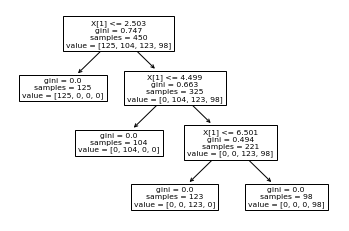

In [12]:
tree.plot_tree(clf.fit(train_x,train_y))

In [13]:
from sklearn.tree.export import export_text
r = export_text(clf.fit(train_x,train_y))
print(r)

|--- feature_1 <= 2.50
|   |--- class: 0
|--- feature_1 >  2.50
|   |--- feature_3 <= 300.04
|   |   |--- class: 1
|   |--- feature_3 >  300.04
|   |   |--- feature_2 <= 39.99
|   |   |   |--- class: 2
|   |   |--- feature_2 >  39.99
|   |   |   |--- class: 3



/home/wirarama/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
